<a href="https://colab.research.google.com/github/Gus-1003/Meteorologia_Estudos_Dados/blob/main/An%C3%A1lise_Dados_Historicos_Anuais_INMET/Analise_INMET_Natal_RN_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fonte: 
    - https://tempo.inmet.gov.br/TabelaEstacoes/A001

# Importando Bibliotecas Python:

In [1]:
#Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Criação do Dataframe:

In [2]:
dados = 'https://raw.githubusercontent.com/Gus-1003/Meteorologia_Estudos_Dados/main/An%C3%A1lise_Dados_Historicos_Anuais_INMET/Ano2021/NATAL%20(A304)_2021-01-01_2021-12-31.csv'
dataframe = pd.read_csv(dados, delimiter=";")

# AnaliseExploratoria:


## Visualização dos dados:

In [3]:
# Esta função retorna as primeiras n linhas do objeto com base na posição. É útil para testar rapidamente se o seu objeto contém o tipo certo de dados.
dataframe.head(25)

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,01/01/2021,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2021,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2021,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2021,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2021,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01/01/2021,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01/01/2021,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01/01/2021,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,01/01/2021,800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,01/01/2021,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Retorna uma tupla representando a dimensionalidade do DataFrame.
dataframe.shape

(8760, 19)

***Análise:***

*   São contabilizadas no total 8760 registros de medidas(linhas) em 19 features (colunas);
*   Os 10 primeiros registros apresentam valores NaN (Not a Number) - Podendo significar alterações não desejadas no dataset que podem si repertir posteriormente;
*   Ao avaliar o padrão conseguimos concluir que os valores NaN ocorrem no periodo de 0 até 900 do atributo UTC (Marca as horas do dia). Podendo assim concluir que as Metricas em questão só são efetuadas de 10h até as 22h, a partir desse ponto elas voltam a ser NaN; 



## Metricas de cada atributo:

In [5]:
# Esse método imprime informações sobre um DataFrame, incluindo o dtype(Tipo do dado) e a quantidade de indices na coluna, valores não nulos e uso de memória.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data                  8760 non-null   object
 1   Hora (UTC)            8760 non-null   int64 
 2   Temp. Ins. (C)        4110 non-null   object
 3   Temp. Max. (C)        4096 non-null   object
 4   Temp. Min. (C)        4096 non-null   object
 5   Umi. Ins. (%)         4110 non-null   object
 6   Umi. Max. (%)         4096 non-null   object
 7   Umi. Min. (%)         4096 non-null   object
 8   Pto Orvalho Ins. (C)  4110 non-null   object
 9   Pto Orvalho Max. (C)  4096 non-null   object
 10  Pto Orvalho Min. (C)  4096 non-null   object
 11  Pressao Ins. (hPa)    4110 non-null   object
 12  Pressao Max. (hPa)    4096 non-null   object
 13  Pressao Min. (hPa)    4096 non-null   object
 14  Vel. Vento (m/s)      4110 non-null   object
 15  Dir. Vento (m/s)      4110 non-null   

***Análise:***

*   As colunas "Data" e "Hora(UTC)" aprensentam mais que o dobro de amostras que as outras colunas;
*   Com exceção da coluna "Hora" ,que possui valores numericos e inteiros, todos os outros atributos são do tipo "Object";
*   A coluna com menos registros é a Raj. Vento com 4043 indices;

In [6]:
# O método "describe" gera estatísticas descritivas. 
    # incluem aquelas que resumem a tendência central, dispersão e forma da distribuição de um conjunto de dados, excluindo NaNvalores.
dataframe.describe()

,Hora (UTC)
count,8760.000000
mean,1150.000000
std,692.258169
min,0.000000
25%,575.000000
50%,1150.000000
75%,1725.000000
max,2300.000000


***Análise:***

*   O método "descibe" por padrão avalia somente as features do tipo inteiro ou flutuante. Nesse caso ele está avaliando somente a coluna de "Horas (UTC)";
*   Apesar de conseguirmos saber disso só visualizando a tabela inicial, aqui temos a certeza que o minimo é 00h e o máximo é 23h;

In [7]:
# Para dados de objetos (por exemplo, strings ou timestamps), o índice do resultado incluirá count, unique, top e freq.

# count =  Quantos indices naquela coluna.
# unique =  Quantos valores diferentes aquela coluna possui.
# top =  o valor que mais si repete. 
# freq = a frequência que esse valor si repetiu

dataframe.describe(include='object')

,Data,Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
count,8760,4110,4096,4096,4110,4096,4096,4110,4096,4096,4110,4096,4096,4110,4110,4043,4080,4110
unique,365,92,99,88,47,43,49,76,76,75,128,127,130,83,167,137,3871,9
top,01/01/2021,"28,6","29,4","28,8","69,0","72,0","67,0","23,4","24,0","22,6","1006,6","1006,6","1006,2","4,9","134,0","9,1","246,90","0,0"
freq,24,128,121,138,300,325,292,183,193,200,98,91,99,160,110,101,3,4016


***Análise:***

*   O atributo "Chuva (mm)" só possui 9 valores unicos, desses 9 valores o atributo "0" si repetiu 4016x;
*   O atributo "Radiação' é o que menos possui repetições de valores;
*   O atributo "Umi.Max.' é o que menos possui menos valores únicos, o que implica que a frequência de repetição desses valores está bem distribuido;

***Conclusão Preliminar:***

*   A frequência de chuvas indicam que durante a maior parte do ano de 2021 Natal passou por um grande periodo de estiagem;
*   Podemos considerar que essas metricas são efetuadas durante o periodo diurno e talvez alguns registros podem não ter sido contabilizados;

***Questionamento Gerados:***

*   Pode ocorrer valores diferentes de chuva ao decorrer de um mesmo dia?
*   Essas quantidades estão sendo contabilizadas?



***Pensamento:***

*   Desenvolver tabela e gráficos baseado nos valores unicos do atributo Data (Dia; Mês; Ano) e a quantidade de chuva que ocorreu em relação a:
    + Quantas chuvas ocorreram em determinado mês:
    + Qual mês possui chuvas mais intensas:

## Limpando o Dataset:

In [8]:
#verifica quantas amostras possuem valor NaN por coluna
dataframe.isna().sum()

Data                       0
Hora (UTC)                 0
Temp. Ins. (C)          4650
Temp. Max. (C)          4664
Temp. Min. (C)          4664
Umi. Ins. (%)           4650
Umi. Max. (%)           4664
Umi. Min. (%)           4664
Pto Orvalho Ins. (C)    4650
Pto Orvalho Max. (C)    4664
Pto Orvalho Min. (C)    4664
Pressao Ins. (hPa)      4650
Pressao Max. (hPa)      4664
Pressao Min. (hPa)      4664
Vel. Vento (m/s)        4650
Dir. Vento (m/s)        4650
Raj. Vento (m/s)        4717
Radiacao (KJ/m²)        4680
Chuva (mm)              4650
dtype: int64

In [9]:
# Remoção das linhas com valores nulos

dataframe.dropna(inplace=True) #o default do dropna é axis = 0 (linhas)

In [10]:
#verifica quantas amostras possuem valor NaN por coluna
dataframe.isna().sum()

Data                    0
Hora (UTC)              0
Temp. Ins. (C)          0
Temp. Max. (C)          0
Temp. Min. (C)          0
Umi. Ins. (%)           0
Umi. Max. (%)           0
Umi. Min. (%)           0
Pto Orvalho Ins. (C)    0
Pto Orvalho Max. (C)    0
Pto Orvalho Min. (C)    0
Pressao Ins. (hPa)      0
Pressao Max. (hPa)      0
Pressao Min. (hPa)      0
Vel. Vento (m/s)        0
Dir. Vento (m/s)        0
Raj. Vento (m/s)        0
Radiacao (KJ/m²)        0
Chuva (mm)              0
dtype: int64

In [11]:
dataframe = dataframe.drop(columns=['Hora (UTC)'])

In [12]:
#mostra tipo de dados das colunas 
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4013 entries, 10 to 8755
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data                  4013 non-null   object
 1   Temp. Ins. (C)        4013 non-null   object
 2   Temp. Max. (C)        4013 non-null   object
 3   Temp. Min. (C)        4013 non-null   object
 4   Umi. Ins. (%)         4013 non-null   object
 5   Umi. Max. (%)         4013 non-null   object
 6   Umi. Min. (%)         4013 non-null   object
 7   Pto Orvalho Ins. (C)  4013 non-null   object
 8   Pto Orvalho Max. (C)  4013 non-null   object
 9   Pto Orvalho Min. (C)  4013 non-null   object
 10  Pressao Ins. (hPa)    4013 non-null   object
 11  Pressao Max. (hPa)    4013 non-null   object
 12  Pressao Min. (hPa)    4013 non-null   object
 13  Vel. Vento (m/s)      4013 non-null   object
 14  Dir. Vento (m/s)      4013 non-null   object
 15  Raj. Vento (m/s)      4013 non-null  

## Foco no atributo Chuva:

In [13]:
#mostra os valores únicos
dataframe['Chuva (mm)'].unique()

array(['0,0', '0,2', '1,0', '0,6', '0,4', '1,4', '0,8', '1,8', '1,2'],
      dtype=object)

In [14]:
#conta quantas amostras em cada valor
dataframe['Chuva (mm)'].value_counts()
#Observe que top na coluna idiona retornou portugues e freq 11831, exatamente o primeiro registro do value_counts

0,0    3921
0,2      70
0,4      11
0,6       4
1,4       2
0,8       2
1,0       1
1,8       1
1,2       1
Name: Chuva (mm), dtype: int64

## Geração de datasets de atributos especificos:

In [16]:
dfTemp = dataframe[['Data', 'Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)', 'Radiacao (KJ/m²)']]
dfUmid = dataframe[['Data', 'Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)', 'Chuva (mm)']]
dfOrvalho = dataframe[['Data', 'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)']]
dfpress = dataframe[['Data', 'Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)', 'Radiacao (KJ/m²)']]
dfVento = dataframe[['Data', 'Vel. Vento (m/s)', 'Dir. Vento (m/s)', 'Raj. Vento (m/s)']]

In [18]:
#mostra tipo de dados das colunas 
dfUmid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4013 entries, 10 to 8755
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Data           4013 non-null   object
 1   Umi. Ins. (%)  4013 non-null   object
 2   Umi. Max. (%)  4013 non-null   object
 3   Umi. Min. (%)  4013 non-null   object
 4   Chuva (mm)     4013 non-null   object
dtypes: object(5)
memory usage: 188.1+ KB


# AnaliseExplicita

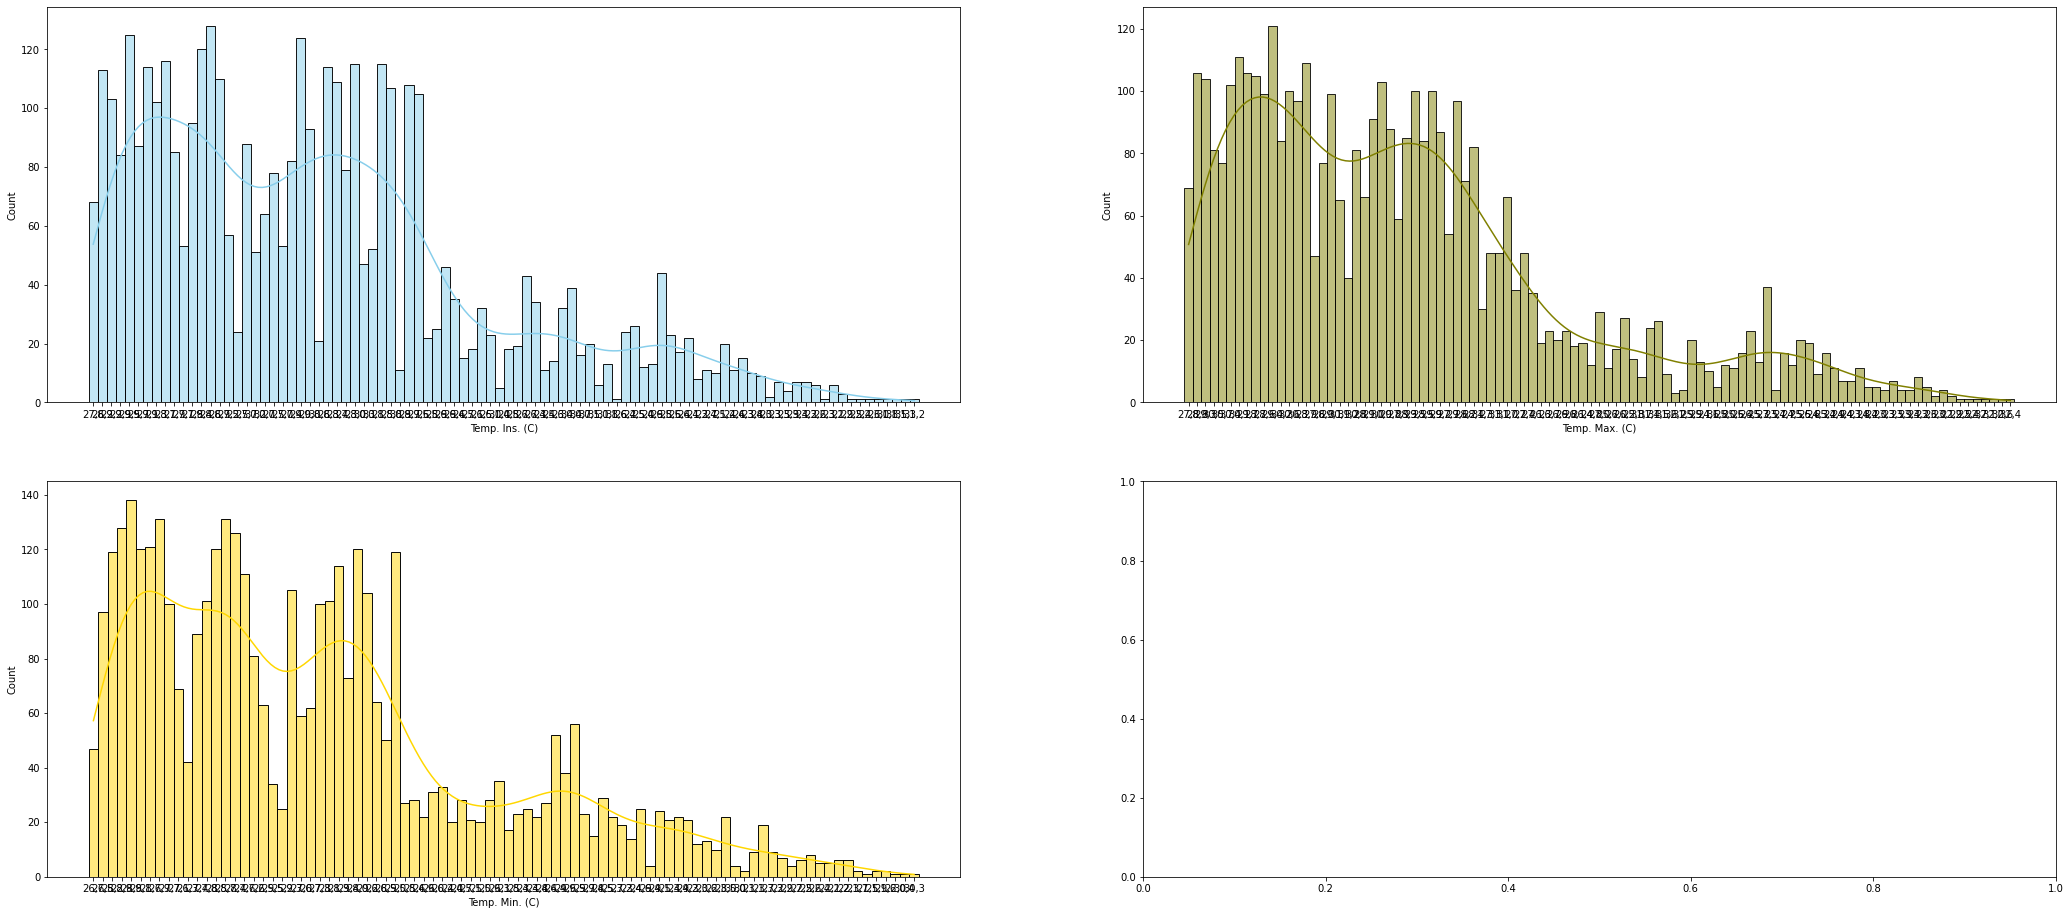

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(36, 16))

sb.histplot(data=dfTemp, x='Temp. Ins. (C)', kde=True, color="skyblue", ax=axs[0, 0])
sb.histplot(data=dfTemp, x='Temp. Max. (C)', kde=True, color="olive", ax=axs[0, 1])
sb.histplot(data=dfTemp, x='Temp. Min. (C)', kde=True, color="gold", ax=axs[1, 0])

plt.show()